## Intro

Last week you had an intro to classification tasks and decision trees. You worked on a model to predict criminal recidivism and made a few visualizations along the way. 

Some of you asked: why Machine Learning? And, even though modeling is part of analysing data and predictions are a huge part of how people use data nowadays, there is something more important to it: visualization are not only powerful to study data, they are also great to understand models. We needed that little extra Machine Learning to explore another way of using visualizations. 

Today, we will do exactly this! The purpose of today's class is threefold: 

1. To explore the data I gave you last week with **interactive visualizations**;
2. To **visualize the results** on criminal recidivism of your machine learning model;
3. To **debias** the results you obtained via two methods (and a bit of visualization along the way).

## Part 1: Interactive visualizations with Bokeh

Until today we have worked with static data visualization. However, exploratory data analysis means to be able to explore the multi-faceted nature of data and *interactive dataviz* is a handy tool to do it! It allows to play with the data: Toggle the view. Zoom. Drag. Show more details. All those things. Those are a key part of modern data visualization. 

To really master interactive visualizations, you should check out methods in JavaScript, especially [D3](https://d3js.org). Given that we only have 5ECTS for this class, we unfortunately don't have time for that. But luckily Python has some pretty good options for interactive visualizations. [Here](https://mode.com/blog/python-interactive-plot-libraries/), you can find some of them.

Today, we'll explore [`Bokeh`](https://docs.bokeh.org/en/latest/), which provides lots of nice interactive funtionalities to Python. To work with Bokeh, we first need to do some preparation:
1. If you haven't installed it yet please do so. You can simply follow [these steps](https://docs.bokeh.org/en/latest/docs/first_steps/installation.html)
2. To include Bokeh in your notebooks you can follow the [Bokeh: Using with Jupyter](https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html#userguide-jupyter-notebook) guide. Come back to this one when you need it
3. We aim to give you a gentle start with Bokeh and I am going to include more example codes than usual in the follwing. However, to get a sense of how things work, I suggest you surf the web, find a Bokeh tutorial and scan through it. Also click around a bit in [the official docs](https://docs.bokeh.org/en/latest/docs/user_guide.html#userguide).

In the exercises below, we will use the data from [GitHub](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/recidivism_dataset_sub.csv):
1. Load the data and select the columns as in Week 6, Exercise 3.1
2. Preprocess the data as in Week 6, Exercise 3.2.

Ok, let's get started!

> *Exercise 1.1:* Interactive data exploration. The aim of this exercise is to compare bar plots for different races. Each bar plot will have age on the x-axis and number of samples in the data on the y-axis. Follow the steps below for success:
>
> * Compute the number of samples by age for each race. You should end up with a dataframe that looks like [this](https://github.com/suneman/socialdata2022/blob/main/files/bokeh-df1.png).
> * Convert your `DataFrame` to Bokeh `ColumnDataSource`.
> * Create an empty figure, you can find the a guide to define a figure in Bokeh online. Here, a little help:
 ```python
p = figure(ADD_PARAMS_HERE) # p is a standard way to call figures in Bokeh
# do not forget to add attributes to the figure, e.g. title, axis names, etc.
 ```
 * Add bars by using `p.vbar()` as follows:
 ```python
    bar ={} # to store vbars 
    # here we will do a for loop to create a bar for each race
    for indx,i in enumerate(races):
         bar[i] = p.vbar(x=ADD_AGE_COLUMN_NAME,  top=i, source= ADD_YOUR_DATA, legend_label=i, ..., muted = ...) 
 ```
 * Make your legend interactive and display the figure:
 ```python
    p.legend.click_policy="mute" # assigns the click policy (you can try to use ''hide')
    show(p) # displays your plot
 ```
 * You will notice that the legend appears in the middle of the figure (and it ocludes some of the data). In order to fix this look into [this guide](https://stackoverflow.com/questions/26254619/position-of-the-legend-in-a-bokeh-plot) as a start. Below are some code snippets that you can use to deal with this problem (but read the guide first):
 ```python
    items = [] # for the custom legend // you need to figure out where to add it
    items.append((i, [bar[i]])) # figure out where to add it
    legend = Legend(items=..., location=.....) # figure out where to add it
    p.add_layout(...., ...) # figure where to add it
    # if you read the guide, it will make sense :)
 ```
 * And now you have it! You can play with colors and other parameters to make it as you like, but first describe your plot. What do you observe?

In [22]:
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/recidivism_dataset_sub.csv')

columns = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'is_recid',
           'days_b_screening_arrest', 'c_charge_degree']
target = ['two_year_recid']

df = df[columns + target]

mask = (
        (df.is_recid != -1) &
        (df.c_charge_degree != 'O') &
        ((-30 <= df.days_b_screening_arrest) & (df.days_b_screening_arrest <= 30))
)
df = df[mask]
df = df.drop(['is_recid', 'c_charge_degree', 'days_b_screening_arrest'], axis=1)

In [24]:
df_counts = df.value_counts(['age', 'race']).reset_index().pivot(index=['age'], columns=['race'], values=0).fillna(0)
df_counts.head()

race,African-American,Asian,Caucasian,Hispanic,Native American,Other
age,,,,,,
18,1.0,0.0,0.0,0.0,0.0,0.0
19,16.0,0.0,7.0,2.0,0.0,1.0
20,95.0,1.0,39.0,10.0,1.0,16.0
21,172.0,1.0,70.0,27.0,1.0,15.0
22,166.0,1.0,75.0,22.0,0.0,8.0


In [25]:
from bokeh.models import ColumnDataSource

source = ColumnDataSource(data=df_counts)

In [26]:
p = figure()

During Week 6 I asked you to visualize a bar plot with the fraction of recommitted crimes over total number of records per race, e.g. the number of recommitted crimes of African-Americans over the total number of crimes of African-Americans, etc. You should have obtained something like [this](https://github.com/suneman/socialdata2022/blob/main/files/frac_recommit_race.png). If we look at this plot we observe that all races but Asian have fraction of recommitted crimes above $30\%$, and African-Americans have the highest fraction, i.e. above $50\%$. However, is this the whole story? Let's have a look at this data from a different angle!

> *Exercise 1.2:* fraction of crimes - a different perspective. In this exercise, we are going to create an interactive scatter plot, where each point is a race, with position given by the number of total samples in the race category on the x-axis and the number of recommitted crimes in the race category on the y-axis. Moreover, each point will have a size given by the fraction computed in Week 6. Follow these steps for success:
> * Create a `DataFrame` with `race` as index and the following columns: 
>     * `n_samples`, i.e. number of samples for each race,
>     * `n_rec_crimes`, i.e. number of recommitted crimes for each race,
>     * `frac_crimes`, i.e. `n_rec_crimes/n_samples`.
> * Convert the dataframe into a `ColumnDataSource` and create an empty figure.
> * Add points in your figure by using 
> ```python
>   p.circle(ADD_X_COLUMN,ADD_Y_COLUMN, size=..., source=..., ...)
> ```
> * Add a `HoverTool()` so that when hovering over a circle both race and size are displayed.
> * You can change colors of the data points by passing an additional color column to `p.circle()`.
> * And now a couple of questions: Explain what you observe. What does this plot shows that the fraction of crimes alone didn't? Do you think the data we are using is representative? What could be some possible issues with this data? 

Once answered the questions above, **take a minute and discuss** your thoughts with your neighbour or one of your group members.

In [27]:
df_race = pd.merge(
    df.groupby('race').count().rename({'age': 'n_samples'}, axis=1).n_samples,
    df.query("two_year_recid == 1").groupby(['race']).count().rename({'age': 'n_rec_crimes'}, axis=1).n_rec_crimes,
    on='race'
)

df_race['frac_crimes'] = df_race.n_rec_crimes / df_race.n_samples

df_race.head()

,n_samples,n_rec_crimes,frac_crimes
race,,,
African-American,3175,1661,0.523150
Asian,31,8,0.258065
Caucasian,2103,822,0.390870
Hispanic,509,189,0.371316
Native American,11,5,0.454545


In [28]:
df_race['size'] = df_race['frac_crimes'] * 75
source = ColumnDataSource(df_race)

In [29]:
TOOLTIPS = [
    ('race', '@race'),
    ('fraction', '@frac_crimes')
]

p = figure(tooltips=TOOLTIPS)

p.circle('n_samples', 'n_rec_crimes', size='size', source=source)

output_notebook()
show(p)

Loading BokehJS ...

Some races such as Asian and Native American have much less samples than African Americans. For the smaller groups it is much less representative of the actual fraction of recomitted crimes as there isn't enough data available.

<details>
    <summary>Ok, it is now time to uncover where this data is coming from. <b>Only click on this cell to open it after you have completed the exercise above</b></summary>
    The data we are using is related to:
    <ul>
        <li> <b>COMPAS</b> (Correctional Offender Management Profiling for Alternative Sanctions), a <a href=https://towardsdatascience.com/compas-case-study-fairness-of-a-machine-learning-model-f0f804108751>popular commercial algorithm</a> used by judges and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism).  </li>
        <li> Multiple works have shown that the algorithm is biased towards non-caucasian people. <b>ProPublica</b> has published an <a href=https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm>extensive work</a> on the topic. </li>
    </ul>
</details>

## Part 2: Visualize the results of a Machine Learning model

Above, we had a deeper look at the recidivism dataset and the visualizations we created highlighted some possible issues/imbalances with the data and especially with race. 

If you had a look at the hidden information cell above, now you know what the problems are with this dataset and with using it to predict recidivism. During Week 6, you trained a classification model to predict criminal recidivism on this data. Now, a question might rise... Is your model biased? If yes, can you do anything about it?

You will now use visualization to better understand the results of your model. This is one of the reasons why visualization is so powerful. Not only it allows us to explore data and create an understanding of the different aspects of it, but it also allows us to understand ML models and their performance!

In the next exercise, use the model you have trained/tested in Week 6 by using only the columns selected in Week 6, Exercise 3.1 and by preprocessing as in Exercise 3.2.

> *Exercise 2:* Evaluating the quality of predictions. One of the simplest ways to get a glimpse into the performance of an classification model is to look at the [Confustion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62).
>
> * Create a confusion matrix that evaluates the performance of your model. What do you observe?
> * Now, create a confusion matrix for specific groups:
>    * Take targets and predictions only for *Caucasians*,
>    * Take targets and predictions only for *African-Americans*.
>    * Create a confusion matrix for each group. What do you see when you compare the two confusion matrices? Explain in your own words how this might affect the overall fairness of your model.

Again, after giving an answer to the questions above, **take a minute and discuss** your thoughts with your neighbour or one of your group members.

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Ignore deprecation warnings
import warnings

warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [31]:
columns = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count']
target = ['two_year_recid']

In [32]:
from sklearn.metrics import plot_confusion_matrix


def build_data(df):
    df_model = df.copy()
    categorical_features = ['sex', 'race']
    encoder = LabelEncoder()

    for col in categorical_features:
        df_model[col] = encoder.fit_transform(df_model[col])

    return df_model, encoder


df_model, encoder = build_data(df)

X_train, X_test, y_train, y_test = train_test_split(df_model[columns], df_model[target], test_size=0.3)

model = RandomForestClassifier(n_estimators=100)
model = model.fit(X=X_train, y=y_train)

Get the class mappings

In [33]:
dict(zip(df.race.unique(), encoder.transform(df.race.unique())))

{'Other': 5,
 'African-American': 0,
 'Caucasian': 2,
 'Hispanic': 3,
 'Asian': 1,
 'Native American': 4}

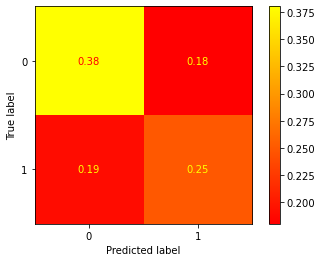

In [34]:
plot_confusion_matrix(model, X=X_test, y_true=y_test, cmap='autumn', normalize='all')
plt.show()

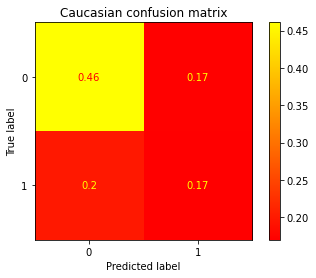

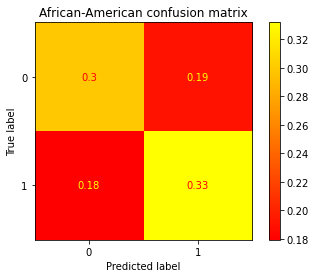

In [35]:
cauc_idx = X_test.query('race == 2').index

X_test_cauc = X_test.filter(items = cauc_idx, axis=0)
y_test_cauc = y_test.filter(items = cauc_idx, axis=0)

plot_confusion_matrix(model, X=X_test_cauc, y_true=y_test_cauc, cmap='autumn', normalize='all')
plt.title('Caucasian confusion matrix')

afro_idx = X_test.query('race == 0').index

X_test_afro = X_test.filter(items = afro_idx, axis=0)
y_test_afro = y_test.filter(items = afro_idx, axis=0)

plot_confusion_matrix(model, X=X_test_afro, y_true=y_test_afro, cmap='autumn', normalize='all')
plt.title('African-American confusion matrix')
plt.show()


We observe that the models have a high number of false-positives and false-negatives. For Caucasians it predicts 4% more false negatives than the African American one. This shows that the model tends to bias Caucasians as less offending than other races.

<details>
    <summary> Exercise 2 interpretation hint <b>(Only open after you have completed the exercise above)</b></summary>
    <ul>
        <li>It seems that our model has higher number of <b>False-Positives</b> or <b>False-Negatives</b> for different groups of people. Go back to Exercise 2 if you did not spot this difference and think at the related implication. </li>
      <li>Several researchers also noticed this issue. The following essay by Ellora Thadaney Israni describes the potential issues with the algorithm and data: <a href = https://www.nytimes.com/2017/10/26/opinion/algorithm-compas-sentencing-bias.html> When an Algorithm Helps Send You to Prison </a> (If you don't have access to it you can find the article on DTU Learn -> Course Content -> Content -> Lecture 7 reading)</li>
    </ul>
</details>

## Part 3: Fairness and bias in Machine Learning

Before we try to fix our model, let's understand bias better and get some intuition about it. In the video below I summarize different types of bias. 

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/tcz800ZXclA/0.jpg)](https://www.youtube.com/watch?v=tcz800ZXclA)

>*Exercise 3.1:* Have you watched the video? A few questions to make sure you did.
> * What does **data bias** mean?
> * What are the most common types of data bias? 
> * Choose two types of data bias and explain them by also providing some examples.
> * How can data bias be identified? 
> * At what step of the process can we correct for bias?
> * What do you think are the potential bias sources in our case-study (i.e. recidivism)?

Alright, now we know a bit more about bias... but how do we correct it in practice? There are many ways, and you are going to test a couple of methods to correct the predictions on recidivism to enhance the fairness of your model.

Germans and I had a nice chat about it and recorded a video to introduce you with two methods: *Demographic Pairity* and *Equal Odds*!

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/DHz1xDKT4xw/0.jpg)](https://www.youtube.com/watch?v=DHz1xDKT4xw)

In the following exercises we are going to focus only on the *African-American* and *Caucasian* groups as they have more data samples in our data (however, you can repeat the steps for other demographics too!).

> *Exercise 3.2:* Demographic Parity. In this exercise, we are going to implement the function for Demographic Parity and apply it to the results of your ML model (i.e. on the predictions of the Test set).
>
> * Compute the probability of predicting recidivism ($\hat{y}=1$) for the two populations, i.e. $P_{AA}$ for African-American and $P_{CA}$ for Caucasian. What do you observe?
> * To debias the output you need to:
>    * Compute the threshold as $th = 1 - \frac{P_{CA}}{P_{AA}}$;
>    * randomly flip positive prediction to negative (1s to 0s), i.e. pick a random number $n\in\left[0,1\right)$ from a uniform distribution and flip a positive prediction if $n < th$.
> * Recompute the probabilities $P_{CA}$ and $P_{AA}$ (only now they are corrected). What do you observe?
> * Plot the confusion matrices with the corrected values. What do you observe?
> * Explain what could be the issue with this method. We have discussed it in the video 😉

In [36]:
n_population = df.query('(race in ["Caucasian", "African-American"])').value_counts('race').sum()

In [37]:
probs = df.query('(race in ["Caucasian", "African-American"]) and (two_year_recid == 1)').value_counts(
    'race') / n_population
probs

race
African-American    0.314703
Caucasian           0.155741
dtype: float64

In [38]:
th = 1 - (probs[1] / probs[0])
print(f'Threshold {th:.3f}')

Threshold 0.505


In [39]:
from numpy.random import random

In [40]:
df['two_year_recid_adj'] = df.apply(
    lambda x: 0 if (x['two_year_recid'] == 1) and (random(1) < th) else x['two_year_recid'], axis=1)

In [41]:
probs = df.query('(race in ["Caucasian", "African-American"]) and (two_year_recid_adj == 1)').value_counts(
    'race') / n_population
probs

race
African-American    0.160667
Caucasian           0.080712
dtype: float64

The African-American bias is significantly reduced!

We plot confusion matricies

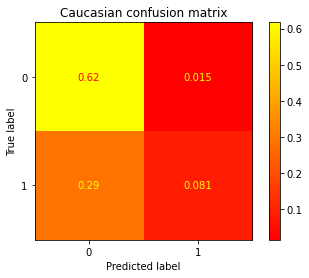

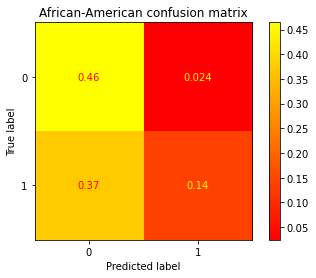

In [42]:
df_model, encoder = build_data(df)

target = 'two_year_recid_adj'
X_train, X_test, y_train, y_test = train_test_split(df_model[columns], df_model[target], test_size=0.3)

model_adjusted = RandomForestClassifier(n_estimators=100)
model_adjusted = model_adjusted.fit(X=X_train, y=y_train)

plot_confusion_matrix(model_adjusted, X=X_test_cauc, y_true=y_test_cauc, cmap='autumn', normalize='all')
plt.title('Caucasian confusion matrix')

plot_confusion_matrix(model_adjusted, X=X_test_afro, y_true=y_test_afro, cmap='autumn', normalize='all')
plt.title('African-American confusion matrix')
plt.show()


**WRITE COMMENTS**

Something about African American bias being reduced.

Difficulties: we manipulate the data and also flip the actual positives of minority classes.

You are almost there! In the following you will use the Equal Odds method to correct your predictions. It seems long, but don't worry it is because I added a bit more code, steps, hints for this one.

> *Exercise 3.3:* Equal Odds. As in the exercise above we are going to use the results of you ML model on the test set.
> * This method takes into account the predictions of your model $\hat{y}$ for different thresholds $th$:
>    * Get the probabilities out of your model by using `y_prob = model.predict_proba(X_test)` (here, `model` is your model).
>    * Define the thresholds as `ths = np.linspace(1e-5,1-1e-5, 10)` (you can edit this one to have different thresholds). Now, you can find $\hat{y}$ as:
>
>
>$$\begin{cases}\hat{y}=1, \mbox{ if } y_{prob} > th \\ \hat{y}=0, \mbox{ otherwhise}\end{cases}$$
>
>
> * Implement a function that takes as an input $y$ (i.e the target labels), $\hat{y}$, and `ths` and returns the true-positive rate $TPR$ and the false-positive rate $FPR$ (definitions in the video above).

In [43]:
from sklearn.metrics import confusion_matrix
import numpy as np


def get_y_hat(y_prob, th):
    """
    :param y_prob: Model probabilities
    :param th: a threshold between 0 and 1
    :return: Equal odds transformed probabilities
    """
    return [1 if x > th else 0 for x in y_prob[:, 1]]


def get_tpr_fpr(y_hat, y_true):
    """
    :param y_true: True targets
    :return: true positive rate and false positive rate
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_hat).ravel()
    return tp, fp

In [44]:
y_hat = get_y_hat(model.predict_proba(X_test), 0.1)
get_tpr_fpr(y_hat, y_test)

(424, 1184)

> * Now, you need to find the thresholds that lead to the closest points for the two groups on the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). The first way is by using the functions below in your code to find the thresholds that lead to the smaller distance (**but suitable FPR and TPR**):
> ```python
    #This function takes as an input y, y_probs, thr
    #and returns the points to plot the ROC curve and their threshold
    def roc_curve(y, y_probs, ths):
        #initialize roc as an empty np.array
        roc = np.array([])
        #loop over thresholds
        for th in ths:
          #convert y_prob in y_hat
          y_hat = ADD_YOUR_FUNCTION_HERE(y_prob,th)
          #compute TPR and FPR
          TPR, FPR = ADD_YOUR_FUNCTION_HERE(y, y_hat)
          #add threshold and point to roc array
          roc = np.append(roc, [th, FPR, TPR])
       #return roc
       return roc.reshape(-1, 3)
> ```
> ```python
    #This function takes as an input the points from one roc (first group) and the other (second group) and order the points by their distance in ascending order
    def closest_points(points1, points2):
        #initialize result
        res = list()
        #loop over points in group 1
        for pi in points1:
          #loop over points in group 2
          for pj in points2:
            #add points and their distance to res
            res.append(((pi, pj), np.linalg.norm(pi[1:] - pj[1:])))
        #return sorted result
        return sorted(res, key = lambda x: x[1])


In [45]:
#This function takes as an input y, y_probs, thr
#and returns the points to plot the ROC curve and their threshold
def roc_curve(y, y_probs, ths):
    #initialize roc as an empty np.array
    roc = np.array([])
    #loop over thresholds
    for th in ths:
        #convert y_prob in y_hat
        y_hat = get_y_hat(y_probs, th)
        #compute TPR and FPR
        TPR, FPR = get_tpr_fpr(y, y_hat)
        #add threshold and point to roc array
        roc = np.append(roc, [th, FPR, TPR])

    #return roc
    return roc.reshape(-1, 3)

In [46]:
#This function takes as an input the points from one roc (first group) and the other (second group) and order the points by their distance in ascending order
def closest_points(points1, points2):
    #initialize result
    res = list()
    #loop over points in group 1
    for pi in points1:
        #loop over points in group 2
        for pj in points2:
            #add points and their distance to res
            res.append(((pi, pj), np.linalg.norm(pi[1:] - pj[1:])))

    #return sorted result
    return sorted(res, key=lambda x: x[1])

In [47]:
ths = np.linspace(1e-5, 1 - 1e-5, 10)

roc_ca = roc_curve(y_test_cauc, model.predict_proba(X_test_cauc), ths)
roc_aa = roc_curve(y_test_afro, model.predict_proba(X_test_afro), ths)
closest_points(roc_ca, roc_aa)

[((array([1.11118889e-01, 3.10000000e+01, 2.09000000e+02]),
   array([  0.44444556, 139.        , 323.        ])),
  157.0350279396288),
 ((array([  0.55555444, 138.        , 102.        ]),
   array([  0.66666333, 246.        , 216.        ])),
  157.0350279396288),
 ((array([  0.77777222, 187.        ,  53.        ]),
   array([  0.77777222, 302.        , 160.        ])),
  157.07959765672945),
 ((array([  0.33333667,  94.        , 146.        ]),
   array([  0.55555444, 196.        , 266.        ])),
  157.49285698088025),
 ((array([1.00e-05, 9.00e+00, 2.31e+02]),
   array([3.33336667e-01, 1.10000000e+02, 3.52000000e+02])),
  157.61345120261785),
 ((array([  0.44444556, 124.        , 116.        ]),
   array([  0.66666333, 246.        , 216.        ])),
  157.74663229368798),
 ((array([1.00e-05, 9.00e+00, 2.31e+02]),
   array([  0.44444556, 139.        , 323.        ])),
  159.26079241294764),
 ((array([  0.88888111, 212.        ,  28.        ]),
   array([  0.77777222, 302.        

A threshold of 0.666 seems to give the best results for a reasonable split between the two metrics TPR and FPR

> ```
> * The second way is by visualizing the ROC curves. Let's do it with Bokeh:
>     * Get the two ROC curves with the function `roc_curve` above and call them `roc_aa` (for African-Americans) and `roc_ca` (for Caucasian).
>     * Create a `DataFrame` called `df_roc` with columns `FPR_AA`, `TPR_AA`, `FPR_CA`, `TPR_CA`, with the FPR and TPR values for both groups. Convert the dataframe into a Bokeh `ColumnDataSource`.
>     * Create an empty bokeh figure and add labels and title (we will have FPR on the x-axis and TPR on the y-axis)
>     * Add two `p.line()` by passing the values from your dataframe for one group and then the other. You should now see the plot with both lines. Use colors and other parameters to customize it as you like
>     * Finally, we need to add one last thing: interactive points that will show the thresholds.
        > The easiest way I found to do this was to create a second `DataFrame` with columns
        >  `x`, `y`, `th` where x is the combined list of `FPR_AA` and `FPR_CA`, y is the combined list of `TPR_AA` and `TPR_CA`, and th is the threshold list repeated twice. Convert this
        >  dataframe into a Bokeh `ColumnDataSource` as usual and add the points to the plot with
> ```python
> cr = p.circle('x','y',source=..., fill_color=..., hover_fill_color=...)
> ````
> you can make them interactive by adding the following line of code:
> ```python
>    p.add_tools(HoverTool(tooltips=[('Threshold', '@th')], renderers=[cr]))
> ```
> * Use the two methods above to find a threshold for each group. What threshold did you find?
> * Debias the output by computing $\hat{y}$ for the two groups with the thresholds you found. Now plot the confusion matrices for African-Americans and Caucasian again. What do you observe?
> * We ended the video by saying that there might be still a problem with the methods we have used to de-bias data. What do you think the problem is? **Hint**: it is related to the [following article](https://en.wikipedia.org/wiki/Protected_group). Skim through it to get an idea!

In [48]:
source = ColumnDataSource(pd.DataFrame(np.hstack([roc_aa, roc_ca[:,1:]]), columns=['th', 'FPR_AA', 'TPR_AA', 'FPR_CA', 'TPR_CA']))

In [49]:
p = figure(title='ROC Curves for Caucasian and African-American groups',
           x_axis_label='FPR',
           y_axis_label='TPR',
           tooltips=[
               ('Threshold', '@th'),
           ])

p.line('FPR_AA', 'TPR_AA', color='red', line_width=4, legend_label='African-American', source=source)
p.line('FPR_CA', 'TPR_CA', color='blue', line_width=4, legend_label='Caucasian', source=source)
p.circle('FPR_AA', 'TPR_AA', color='red', size=10, legend_label='African-American', source=source)
p.circle('FPR_CA', 'TPR_CA', color='blue', size=10, legend_label='Caucasian', source=source)



output_notebook()
show(p)

Loading BokehJS ...

If we project each point on top of the other line (orthogonally), we can get the distance between the points. It seems that the point where the threshold is 0.6667 has the least distance to the corresponding point on the other line.

In [50]:
y_hat_adj_cauc = get_y_hat(model.predict_proba(X_test_cauc), th=0.6667)
y_hat_adj_afro = get_y_hat(model.predict_proba(X_test_afro), th=0.6667)

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

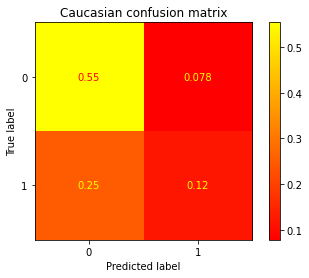

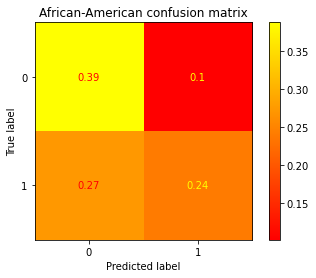

In [52]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test_cauc, y_pred=y_hat_adj_cauc, cmap='autumn', normalize='all')
plt.title('Caucasian confusion matrix')

ConfusionMatrixDisplay.from_predictions(y_true=y_test_afro, y_pred=y_hat_adj_afro, cmap='autumn', normalize='all')
plt.title('African-American confusion matrix')
plt.show()

Well done! It is now time for you to have a break, relax and be proud of the awesome work you have done!! But before you go, please <mark> take a minute of your time (it is really one minute) to fill this [form](https://forms.gle/fbUXFxmJ283cKGvy6). Thank you so much! </mark>